In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [ 
    ('Superstore-sheet-after-cleaning.xlsx', 'superstore1')
]

# connect to the MySQL database
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'root',
    database = 'superstore'
)

cursor = conn.cursor()

# Folder containing csv file
folder_path = 'D:/Coding/ms-excel/Superstore/'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_excel(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing Superstore-sheet-after-cleaning.xlsx
NaN values before replacement:
Order ID         0
OrderDate        0
ShipDate         0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Months     0
order year       0
Profit/Loss      0
dtype: int64



In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host = 'localhost',
    username = 'root',
    password = 'root',
    database = 'superstore'
)

cursor = db.cursor()


In [243]:
# Display table

In [92]:
query = """ select * from superstore1 limit 2 """

cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,Order_ID,OrderDate,ShipDate,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,...,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Months,order_year,Profit/Loss
0,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.0,14.1694,6,2014,Profit
1,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656,6,2014,Profit


In [71]:
# Top products by sales

In [132]:
query = """ select Product_Name, sum(Sales) as TotalSales from superstore1
group by Product_Name 
order by TotalSales desc
limit 5 """
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data , columns = ['Product Name','Total Sales'])
df

,Product Name,Total Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.822266
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384033
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480469
3,HON 5400 Series Task Chairs for Big and Tall,21870.575500
4,GBC DocuBind TL300 Electric Binding System,19823.478516


In [73]:
# Total profit by region

[]

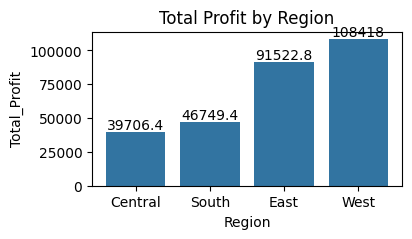

In [221]:
query = """select Region, sum(Profit) as Total_Profit from superstore1 
group by Region
order by Total_Profit asc"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
plt.figure(figsize = (4,2))
ax = sns.barplot(x = df['Region'] , y = df['Total_Profit'] , data = df )
ax.bar_label(ax.containers[0])
plt.title('Total Profit by Region')
plt.plot()


In [75]:
# Total profit by Category

In [178]:
query = """ select Category , sum(Profit) as Total_Profit from superstore1
group by Category 
order by Total_Profit desc"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ['Category','Total Profit'])
print('Total profit by Categories are: \n' , df )

Total profit by Categories are: 
           Category   Total Profit
0       Technology  145454.947453
1  Office Supplies  122490.800647
2        Furniture   18451.272711


In [ ]:
# Total Sales by Category

In [179]:
query = """ Select Category, sum(Sales) as TotalSales from superstore1
group by Category 
order by TotalSales desc
"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,Category,TotalSales
0,Technology,836154.030862
1,Furniture,741999.793703
2,Office Supplies,719047.031284


In [77]:
# 📊 Total Sales by region

[]

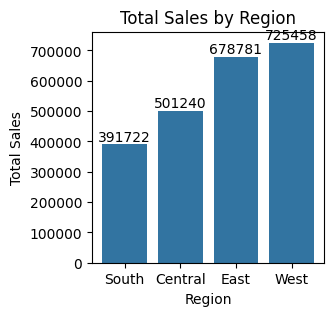

In [183]:
query = """ select Region, sum(Sales) as Total_Sales from superstore1
group by Region
order by Total_Sales"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ['Region','Total Sales'])
plt.figure(figsize = (3,3))
ax = sns.barplot(x= df['Region'], y = df['Total Sales'],data = df)
plt.title('Total Sales by Region')
ax.bar_label(ax.containers[0])
plt.plot()

In [ ]:
# Orders Count by Customer

In [186]:
query = """ select Customer_Name, count(*) Total_Orders from superstore1 
group by Customer_Name 
order by Total_Orders desc
limit 5"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,Customer_Name,Total_Orders
0,William Brown,37
1,Paul Prost,34
2,John Lee,34
3,Matt Abelman,34
4,Jonathan Doherty,32


In [187]:
# Monthly Sales trends

In [188]:
query = """ SELECT DATE_FORMAT(`OrderDate`, '%Y-%m') AS Order_Month, SUM(Sales) AS Total_Sales
FROM superstore1
GROUP BY Order_Month
ORDER BY Order_Month;
"""
cursor.execute(query)
data = cursor.fetchall()
data

[(None, 2297200.8558493257)]

In [24]:
# Most profitable customer

In [ ]:
query = """  """
cursor.execute(query)
data = cursor.fetchall()
data

In [189]:
# Top 5 States by Profit

In [190]:
query = """ select State , sum(Profit) as Total_Profit from superstore1
group by State
order by Total_Profit desc 
limit 3,5"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,State,Total_Profit
0,Michigan,24463.187780
1,Virginia,18597.950311
2,Indiana,18382.935908
3,Georgia,16250.043296
4,Kentucky,11199.696645


In [191]:
# Products with Negative Profit

In [192]:
query = """ select Product_Name , sum(Profit) as Total_Profit
from superstore1
group by Product_Name
having Total_Profit < 0
order by Total_Profit asc
limit 5"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,Product_Name,Total_Profit
0,Cubify CubeX 3D Printer Double Head Print,-8879.970428
1,Lexmark MX611dhe Monochrome Laser Printer,-4589.972961
2,Cubify CubeX 3D Printer Triple Head Print,-3839.990479
3,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.115608
4,Bush Advantage Collection Racetrack Conference...,-1934.397583


In [193]:
# Sales by Ship Mode

In [201]:
query = """ select Ship_Mode, round(sum(sales),2) as Total_Sales from superstore1
group by Ship_Mode
order by Total_Sales desc"""
cursor.execute(query)
data = cursor.fetchall()
# data
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,Ship_Mode,Total_Sales
0,Standard Class,1358215.74
1,Second Class,459193.57
2,First Class,351428.42
3,Same Day,128363.12


In [ ]:
# Most Selling Sub-Categories by Region

In [245]:
query = """ WITH RegionSubCat AS (
    SELECT Region, Sub_Category, SUM(Quantity) AS TotalQty
    FROM superstore
    GROUP BY Region, Sub_Category
),
RankedSubCat AS (
    SELECT *,
           RANK() OVER (PARTITION BY Region ORDER BY TotalQty DESC) AS rnk
    FROM RegionSubCat
)
SELECT Region, Sub_Category, TotalQty
FROM RankedSubCat
WHERE rnk = 1;


"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
df

,Region,Sub_Category,TotalQty
0,Central,Binders,1473
1,East,Binders,1652
2,South,Binders,981
3,West,Binders,1868


In [240]:
# Discount Impact Analysis

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

<Figure size 400x400 with 0 Axes>

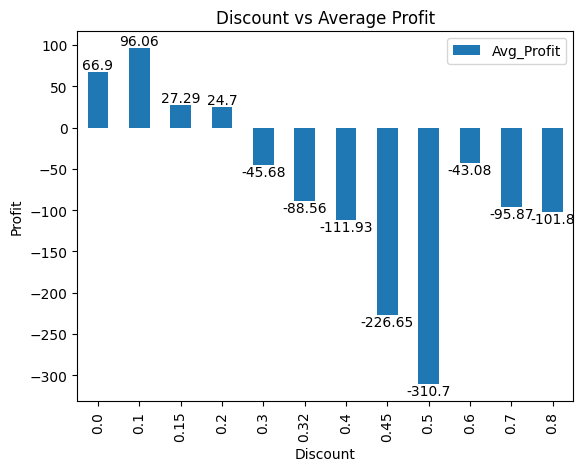

In [246]:
query = """ select Discount, round(avg(Profit),2) as Avg_Profit 
from superstore1
group by Discount
order by Discount"""
cursor.execute(query)
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns = columns)
plt.figure(figsize = (4,4))
ax = df.plot(x = 'Discount', y = 'Avg_Profit', kind = 'bar')
ax.bar_label(ax.containers[0])
plt.title('Discount vs Average Profit')
plt.ylabel('Profit')
plt.plot